In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection

sns.set(style='ticks', palette='Set1')
%matplotlib inline
plt.rcParams['figure.figsize']= (8,6)

In [5]:
df = pd.read_csv('./training.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6838 entries, 0 to 6837
Data columns (total 11 columns):
segment_id               6838 non-null object
wellbore_chev_no_id      6838 non-null object
area_id                  6838 non-null object
formation_id             6838 non-null object
bit_model_id             6838 non-null object
drillbit_size            6838 non-null float64
min_depth                6838 non-null float64
max_depth                6838 non-null float64
rate_of_penetration      6838 non-null float64
surface_weight_on_bit    6838 non-null float64
surface_rpm              6838 non-null float64
dtypes: float64(6), object(5)
memory usage: 587.7+ KB


In [8]:
df.describe()

,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
count,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000
mean,15.726309,19609.123574,19638.444245,106.997573,35.791311,156.262449
std,3.522179,5739.149255,5739.051073,55.061943,13.363067,25.217998
min,8.500000,4988.500000,5009.500000,5.382589,5.203333,60.594999
25%,12.250000,14970.000000,14999.500000,62.480077,26.348941,140.665599
50%,16.500000,20040.000000,20069.500000,100.828372,36.983090,159.661078
75%,18.125000,24120.000000,24149.500000,136.087159,44.311884,175.560704
max,26.000000,31050.000000,31070.750000,512.754999,71.328106,211.066667


In [9]:
df.head()

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0_727,wellbore_chev_no_0,area_0,formation_62,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,wellbore_chev_no_0_728,wellbore_chev_no_0,area_0,formation_61,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,wellbore_chev_no_0_729,wellbore_chev_no_0,area_0,formation_59,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,wellbore_chev_no_0_730,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,wellbore_chev_no_0_731,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [193]:
#df.groupby('segment_id').size()
df.groupby('area_id').size()

area_id
area_0    2872
area_1    3966
dtype: int64

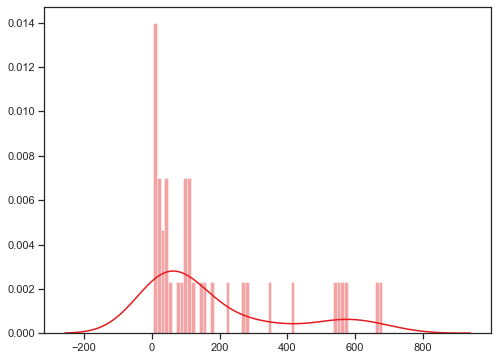

In [29]:
bit_model_id = df.groupby('bit_model_id').size()

sns.distplot(bit_model_id, bins = 60);

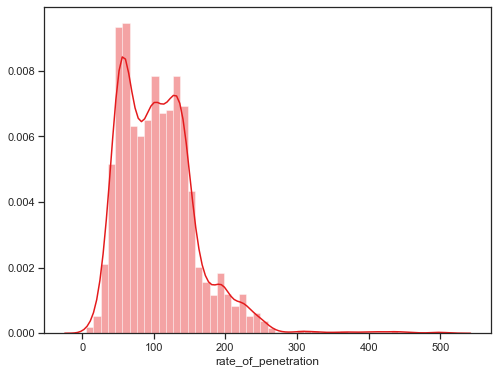

In [109]:
target = sns.distplot(df.rate_of_penetration);
target;
#sns.distplot();

In [32]:
len(bit_model_id)

38

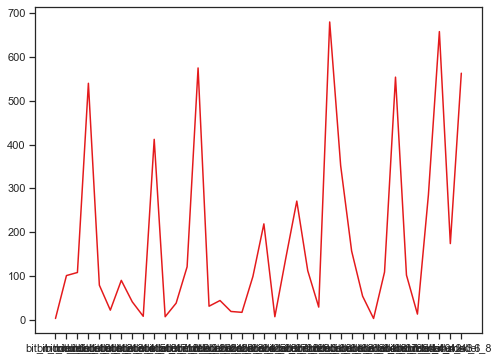

In [22]:
plt.plot(df.groupby('bit_model_id').size())

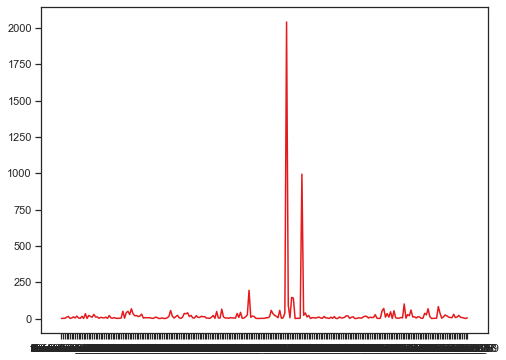

In [24]:
plt.plot(df.groupby('formation_id').size())

In [196]:
X = df.iloc[:,5:]
#X = X.copy().
print(len(X_columns))
print(X_columns)

11
{'formation_id', 'surface_weight_on_bit', 'wellbore_chev_no_id', 'surface_rpm', 'bit_model_id', 'min_depth', 'drillbit_size', 'area_id', 'rate_of_penetration', 'segment_id', 'max_depth'}


In [197]:
X = df.iloc[:,5:]
X = X.copy().drop('rate_of_penetration', axis = 1)
display(X.head())

y = df['rate_of_penetration']
display(y.head())

,drillbit_size,min_depth,max_depth,surface_weight_on_bit,surface_rpm
0,12.25,21834.5,21839.5,43.533280,150.369091
1,12.25,21840.0,21869.5,42.382033,150.369001
2,12.25,21870.0,21899.5,48.675129,150.429335
3,12.25,21900.0,21929.5,30.041290,150.080000
4,12.25,21930.0,21959.5,31.406319,150.032167


0     99.614650
1     99.354021
2     83.622907
3     85.427731
4    100.639811
Name: rate_of_penetration, dtype: float64

In [166]:
#X = X.copy().drop('max_depth', axis=1)

In [212]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6154, 5) (684, 5) (6154,) (684,)


In [213]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse
#from sklearn

forest = RandomForestRegressor(max_depth = 15, n_estimators = 100)
#forest = RandomForestRegressor()
forest.fit(X_train, y_train)

forest_predictions = forest.predict(X_test)
score = forest.score(X_test, y_test)

In [214]:
#training performance:
train_predict = forest.predict(X_train)
score = forest.score(X_train, y_train)

test_predict = forest.predict(X_test)
score = mse(y_test, test_predict)

# plt.plot(range(y_test.shape[0]),test_predict, label = 'Random Forest Model', alpha = 1);
# plt.plot(range(y_test.shape[0]),y_test, label = "y_train", alpha= .5);
# plt.legend()
# plt.title("Random Forest Model Training performance");
print("Training Mean Squared Error:", mse(y_train, train_predict))
print("Testing Mean Squared Error:",mse(y_test, test_predict))

Training Mean Squared Error: 82.81360999372059
Testing Mean Squared Error: 371.6273651644556


## NEW TRAINING DATA

In [243]:
X_ntrain, X_ntest, y_ntrain, y_ntest = model_selection.train_test_split(X,y,test_size=0.2)

In [244]:
forest_new = RandomForestRegressor(max_depth = 15, n_estimators = 100, min_samples_split = 3)
#forest = RandomForestRegressor()
forest_new.fit(X_train, y_train)

forest_predictions = forest_new.predict(X_test)
score = forest_new.score(X_test, y_test)

train_predict = forest_new.predict(X_train)
score = forest_new.score(X_train, y_train)

test_predict = forest_new.predict(X_test)
score = mse(y_test, test_predict)

# plt.plot(range(y_test.shape[0]),test_predict, label = 'Random Forest Model', alpha = 1);
# plt.plot(range(y_test.shape[0]),y_test, label = "y_train", alpha= .5);
# plt.legend()
# plt.title("Random Forest Model Training performance");
print("Training Mean Squared Error:", mse(y_train, train_predict))
print("Testing Mean Squared Error:",mse(y_test, test_predict))

Training Mean Squared Error: 94.47655238839302
Testing Mean Squared Error: 342.3733811512725


In [245]:
import pickle
pickle.dump(forest_new, open( "forest_mss3.p", "wb" ) )

In [232]:
X.columns

Index(['drillbit_size', 'min_depth', 'max_depth', 'surface_weight_on_bit',
       'surface_rpm'],
      dtype='object')

In [78]:
train_predict.shape

(6154,)

In [135]:
h = []
for n_trees in np.arange(150,200,5):
    rfc = RandomForestRegressor(n_estimators = n_trees)
    rfc_cv_scores = model_selection.cross_val_score(rfc, X_train, y_train, scoring = 'neg_mean_squared_error',cv=8)
    print("CV with {} trees:".format(n_trees))
    print(rfc_cv_scores)
    print("avg= {}".format(np.mean(np.abs(rfc_cv_scores))))
    h.append(np.mean(np.abs(rfc_cv_scores)))

CV with 150 trees:
[-386.99032058 -571.71669063 -478.8151719  -367.41838591 -292.235018
 -493.4085911  -671.67077214 -384.85870818]
avg= 455.88920730496466
CV with 155 trees:
[-388.79889491 -576.2152784  -477.80030525 -386.63604822 -282.95293197
 -488.92744025 -634.85658253 -400.32108554]
avg= 454.56357088255294
CV with 160 trees:
[-388.08279004 -571.30577818 -483.68550316 -366.846959   -303.6053739
 -489.20610463 -628.15123519 -388.4969521 ]
avg= 452.4225870228347
CV with 165 trees:
[-389.58492221 -573.45390237 -473.07065668 -374.79570391 -296.92069337
 -479.15763096 -639.343237   -387.07184236]
avg= 451.6748236067285
CV with 170 trees:
[-389.61130459 -578.59820393 -497.07580045 -370.12848009 -289.54408325
 -488.67463034 -656.37217681 -406.24475185]
avg= 459.5311789145717
CV with 175 trees:
[-388.95576082 -579.9526721  -482.60325174 -376.09507777 -289.27393006
 -493.63710518 -625.07287869 -389.85493654]
avg= 453.1807016127823
CV with 180 trees:
[-376.96430324 -560.55193926 -487.706103

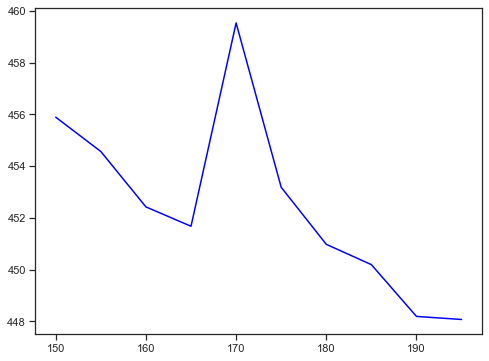

In [142]:
plt.plot(np.arange(150, 200, 5), h, label ='n_estimators', c='b');

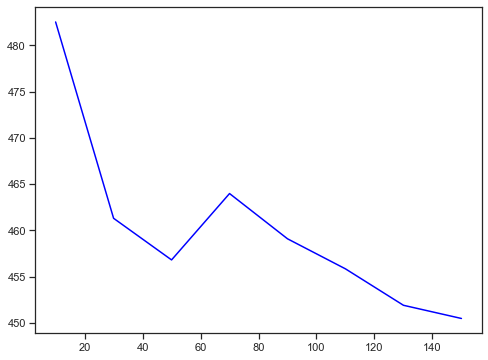

In [134]:
plt.plot(np.arange(10,160,20), h, label ='n_estimators', c='b');

In [191]:
train_sizes, train_scores, valid_scores = model_selection.learning_curve(
    RandomForestRegressor(n_estimators = 100),
    X_train, y_train, train_sizes=np.linspace(.1,1,10),scoring = 'neg_mean_squared_error',
    cv=10)

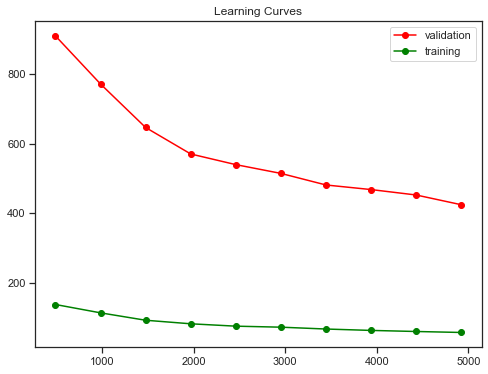

In [192]:
plt.plot(train_sizes, -valid_scores.mean(1), 'o-', color="r", label = 'validation')
plt.plot(train_sizes, -train_scores.mean(1), 'o-', color="g", label = 'training')
plt.title('Learning Curves')
plt.legend()

# Target Encoding - using categorical variables to the fullest extent

In [395]:
X_copy = df.copy()
X_copy.head()

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0_727,wellbore_chev_no_0,area_0,formation_62,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,wellbore_chev_no_0_728,wellbore_chev_no_0,area_0,formation_61,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,wellbore_chev_no_0_729,wellbore_chev_no_0,area_0,formation_59,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,wellbore_chev_no_0_730,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,wellbore_chev_no_0_731,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [396]:
X_train, X_test, y_test, y_train = model_selection.train_test_split(X_copy,y,test_size=0.2)


In [398]:
means = X_train.groupby('formation_id')['rate_of_penetration'].mean()
# print(means)
X_train['formation_id' + ' encode'] = X_train['formation_id'].map(means);
X_train.head()
#np.isnan(X_train).sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm,formation_id encode
3811,wellbore_chev_no_3_442,wellbore_chev_no_3,area_0,formation_231,bit_model_20,16.500,13260.0,13289.50,114.020499,23.682833,150.358166,133.318874
6120,wellbore_chev_no_8_674,wellbore_chev_no_8,area_1,formation_213,bit_model_10,18.125,20220.0,20249.50,116.252974,21.087151,139.915318,96.511463
6343,wellbore_chev_no_8_897,wellbore_chev_no_8,area_1,formation_15,bit_model_29,12.250,26910.0,26939.50,118.748464,44.090645,180.079217,76.874355
1424,wellbore_chev_no_17_804,wellbore_chev_no_17,area_0,formation_82,bit_model_28,12.250,24120.0,24149.50,128.304557,38.272249,160.756334,77.289925
3726,wellbore_chev_no_24_983,wellbore_chev_no_24,area_1,formation_166,bit_model_31,12.250,29490.0,29519.75,60.850083,50.999500,147.225000,68.692618


In [399]:
X_train['formation_id encode']

3811    133.318874
6120     96.511463
6343     76.874355
1424     77.289925
3726     68.692618
76       73.928569
5832    129.755291
457     129.755291
1762    133.318874
5584     72.571874
590     129.755291
4768    129.755291
5267    129.755291
2651    141.180586
5967    129.755291
2309    129.755291
2021    133.318874
1624     51.309044
446      38.586782
1636    133.318874
2434    129.755291
360      93.423179
5861    129.755291
6316     84.856526
5665     76.874355
270      93.423179
6837     56.670754
3488    114.172597
4472    129.755291
1181     92.518450
           ...    
2316    129.755291
5072    129.755291
6605    145.538069
700     129.755291
3162     63.607235
4646    129.755291
966     200.591876
4764    129.755291
4122     73.376432
4525    129.755291
144      89.654509
2394    129.755291
4083     87.036511
6437    133.318874
1527     84.706404
6833     66.593534
3634     90.354329
1069    200.591876
1350    132.165928
6069    129.755291
5565     91.520131
3439    100.

In [377]:
encoded['formation_id']
print(len(means))
len(X_train.groupby('formation_id').size())

236


236

In [370]:
len(means)

5470

In [378]:
categorical_list = ['segment_id', 'wellbore_chev_no_id', 'area_id', 'formation_id', 'bit_model_id', 'drillbit_size']
encoded = pd.DataFrame()
for i in categorical_list:
    means = X_train.groupby(i)['rate_of_penetration'].mean()
    X_train[i + 'e'] = X_train[i].map(means)
display(encoded.head())
X.shape

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


""


(0, 0)

In [350]:
np.isnan(encoded).sum()

segment_id             1085
wellbore_chev_no_id       0
area_id                   0
formation_id              8
bit_model_id              0
drillbit_size             0
dtype: int64

In [354]:
encoded.drop('segment_id', axis=1)
#encoded.columns
encoded = encoded.fillna(0)
np.isnan(encoded).sum()

segment_id             0
wellbore_chev_no_id    0
area_id                0
formation_id           0
bit_model_id           0
drillbit_size          0
dtype: int64

In [352]:
idx = np.array(encoded.index[np.isnan(encoded)['segment_id']])
idx
#X_train.head()

array([], dtype=int64)

In [359]:
X_train = pd.concat([X_train.reset_index(drop=True),encoded.reset_index(drop=True)], axis=1)
#np.isnan(X_train).sum()
X_train.shape

(5470, 47)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [404]:
pd.read_csv('One Hot.csv')

FileNotFoundError: File b'./filesForStartOfDatathon/One Hot.csv' does not exist